This notebook contains some plots of the PDF, and the CDF of the prior over the effectiveness of each NPI. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def assymetric_laplace_pdf(x, scale, k):
    return scale/(k + (k ** -1)) * np.exp(-x * scale * np.sign(x) * (k ** np.sign(x)) )


def assymetric_laplace_cdf(x, scale, k):
    if x < 0:
        return np.exp(x*scale/k) * (k**2) / (1 + k**2) 
    else:
        return 1 - np.exp(-x*scale*k) / (1 + k**2) 

In [3]:
def assymetric_laplace_pdf_trans(y, scale, k):
    x = -np.log(y)
    return scale/(k + (k ** -1)) * np.exp(-x * scale * np.sign(x) * (k ** np.sign(x)))/y

In [4]:
scale = 10
kappa = 0.5

In [5]:
xvals = np.linspace(-2, 2, 1000)

pdf = np.array([assymetric_laplace_pdf(x, scale, kappa) for x in xvals])
cdf = np.array([assymetric_laplace_cdf(x, scale, kappa) for x in xvals])

Text(0.5, 1.0, 'CDF')

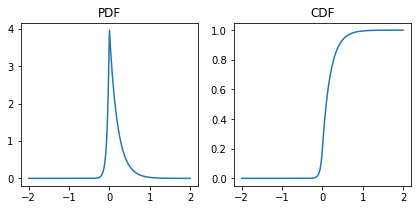

In [6]:
plt.figure(figsize=(7, 3))
plt.subplot(121)
plt.plot(xvals, pdf)
plt.title('PDF')
plt.subplot(122)
plt.plot(xvals, cdf)
plt.title('CDF')

In [8]:
import pymc3 as pm

In [9]:
from epimodel.pymc3_distributions.asymmetric_laplace import AsymmetricLaplace

Set Theano Environmental Variables for Parallelisation


In [10]:
x = AsymmetricLaplace.dist(10, 0.5)

In [11]:
samples = x.random(size=1000000).eval()

In [12]:
ts = 100*(1-np.exp(-samples))

In [13]:
import arviz as az

Text(0.5, 1.0, 'NPI Effectiveness Prior')

<Figure size 900x900 with 0 Axes>

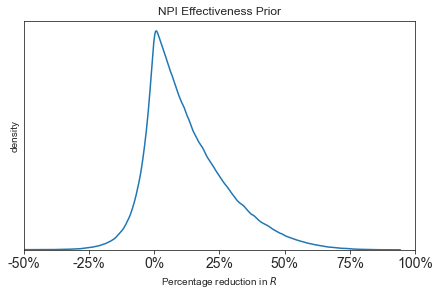

In [14]:
plt.figure(figsize=(3, 3), dpi=300)
az.plot_kde(ts)

plt.xlabel('Percentage reduction in $R$')
plt.xlim([-50, 100])
plt.ylim([0, 0.04])
xtick_locs = [-50, -25, 0, 25, 50, 75, 100]
plt.xticks(xtick_locs, [f'{l}%' for l in xtick_locs])
plt.yticks([])
plt.ylabel('density')
plt.title('NPI Effectiveness Prior')

In [17]:
np.mean(np.abs(ts) < 10)

0.497242